In [4]:
words = open('names.txt', 'r').read().splitlines()

In [5]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [6]:
len(words)

32033

In [7]:
min(len(w) for w in words)

2

In [8]:
max(len(w) for w in words)

15

In [11]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [10]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('<S>', 'a'), 10075),
 (('a', '<E>'), 4966),
 (('e', '<E>'), 4817),
 (('n', '<E>'), 4134),
 (('<S>', 'e'), 4089),
 (('i', '<E>'), 3965),
 (('a', 'i'), 3903),
 (('a', 'a'), 3542),
 (('<S>', 'i'), 2809),
 (('l', 'n'), 2684),
 (('i', 'a'), 2679),
 (('<S>', 'o'), 2599),
 (('a', 'e'), 2445),
 (('<S>', 'r'), 2209),
 (('o', '<E>'), 2071),
 (('l', '<E>'), 1924),
 (('y', '<E>'), 1914),
 (('a', 'l'), 1881),
 (('r', '<E>'), 1787),
 (('e', 'a'), 1670),
 (('<S>', 'l'), 1568),
 (('a', 'n'), 1546),
 (('<S>', 'h'), 1527),
 (('e', 'i'), 1487),
 (('e', 'l'), 1468),
 (('m', 'r'), 1351),
 (('<S>', 'y'), 1346),
 (('r', 'e'), 1337),
 (('<S>', 'u'), 1331),
 (('n', 'e'), 1325),
 (('s', 'a'), 1324),
 (('l', 'a'), 1321),
 (('i', 'n'), 1311),
 (('l', 'e'), 1305),
 (('i', 'h'), 1242),
 (('n', 'a'), 1241),
 (('a', 'd'), 1219),
 (('y', 'n'), 1197),
 (('a', 'y'), 1173),
 (('i', 'e'), 1160),
 (('r', 'a'), 1105),
 (('r', 'n'), 1102),
 (('e', 'e'), 1049),
 (('a', 'r'), 1041),
 (('l', 'i'), 1022),
 (('l', 'y'), 976),


In [20]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    trigram = (ch1, ch2, ch3)
    b[trigram] = b.get(trigram, 0) + 1

In [21]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', 'h', '<E>'), 1714),
 (('n', 'a', '<E>'), 1673),
 (('a', 'n', '<E>'), 1509),
 (('o', 'n', '<E>'), 1503),
 (('<S>', 'm', 'a'), 1453),
 (('<S>', 'j', 'a'), 1255),
 (('<S>', 'k', 'a'), 1254),
 (('e', 'n', '<E>'), 1217),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '<E>'), 953),
 (('a', 'r', 'i'), 950),
 (('i', 'a', '<E>'), 903),
 (('i', 'e', '<E>'), 858),
 (('a', 'n', 'n'), 825),
 (('e', 'l', 'l'), 822),
 (('a', 'n', 'a'), 804),
 (('i', 'a', 'n'), 790),
 (('m', 'a', 'r'), 776),
 (('i', 'n', '<E>'), 766),
 (('e', 'l', '<E>'), 727),
 (('y', 'a', '<E>'), 716),
 (('a', 'n', 'i'), 703),
 (('<S>', 'd', 'a'), 700),
 (('l', 'a', '<E>'), 684),
 (('e', 'r', '<E>'), 683),
 (('i', 'y', 'a'), 669),
 (('l', 'a', 'n'), 647),
 (('<S>', 'b', 'r'), 646),
 (('n', 'n', 'a'), 633),
 (('<S>', 'a', 'l'), 632),
 (('<S>', 'c', 'a'), 628),
 (('r', 'a', '<E>'), 627),
 (('n', 'i', '<E>'), 625),
 (('<S>', 'a', 'n'), 623),
 (('n', 'n', '<E>'), 619),
 (('n', 'e', '<E>'), 607),
 (('e', 'e', '<E>'), 605),
 (('e', 'y', '<

In [14]:
import torch

In [25]:
N = torch.zeros((27, 27, 27), dtype=torch.int32)

In [26]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [34]:

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    N[ix1, ix2, ix3] += 1

N = N.view(-1, N.shape[2])
    

In [40]:
import math

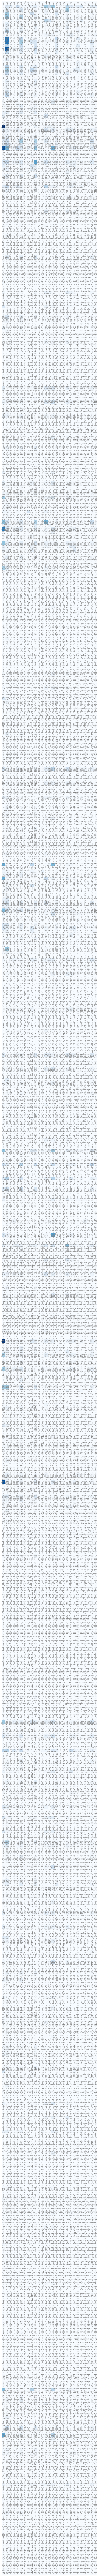

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,256))
plt.imshow(N, cmap='Blues')
for i in range(27*27):
    for j in range(27):
        i1, i2 = divmod(i, 27)
        chstr = itos[i1] + itos[i2] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [37]:
N[:, 0]

tensor([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  200,  180,   55,  530,  735,   70,   10, 8570,
         915,  225,  170,  875,  945, 7545,   60,   10,   35, 1140,  865,  280,
          75,  225,   55,   55,  815,  190,    0,  230,    5,    0,    0,  125,
           0,    0,   20,  170,    0,    0,    0,    0,    5,   30,    0,    0,
           0,    0,    0,   10,    0,    0,    0,  275,    0,    0,  315,    0,
          10,    0, 1170,    0,    0,  180,  130,    5,  600,    0,    0,    0,
         195,    0,    0,    0,    0,   10,    0,    0,    0,    0,  190,    0,
           0,  985,    0,    0,   30,  460,    0,    0,   45,  520,    5,    0,
           0,    0,   30,  325,    0,    0,   20,   25,   15,   20,    0,    0,
           0,  640,    0,    0,  790,  105,   20,  355, 3025,  110,   20,  180,
         455,   45,  250, 3635,  640, 60

In [17]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [18]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [19]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [20]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [21]:
p.shape

torch.Size([3])

In [30]:
P.shape

torch.Size([27, 27])

In [29]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [24]:
# 27, 27
# 27,  1

In [28]:
P.sum(1).shape

torch.Size([27])

In [26]:
# 27, 27
#  1, 27

In [310]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [164]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [165]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [435]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-564996.8125, grad_fn=<AddBackward0>)
nll=tensor(564996.8125, grad_fn=<NegBackward0>)
2.476470470428467


In [449]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [450]:
xs

tensor([ 0,  5, 13, 13,  1])

In [451]:
ys

tensor([ 5, 13, 13,  1,  0])

In [487]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [488]:
xenc.shape

torch.Size([5, 27])

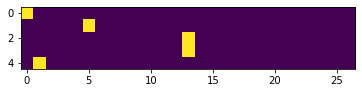

In [489]:
plt.imshow(xenc)

In [490]:
xenc.dtype

torch.float32

In [493]:
W = torch.randn((27, 1))
xenc @ W

tensor([[-0.2003, -2.3711, -0.9466,  0.5369, -0.0949, -1.7872, -0.9038,  0.8194,
          0.6926,  0.0114, -1.5301,  0.6077, -1.2056,  1.8605, -1.3012, -0.0301,
         -2.1611, -0.0538, -0.0133, -0.3629,  0.5254, -0.0080,  1.1602,  1.9851,
          0.4976,  0.7351, -0.6373],
        [-0.4422,  0.5024,  1.3514, -0.4085, -0.7854, -1.2568, -0.4558,  0.1466,
         -0.4460,  1.2748, -0.6367,  0.6403, -0.5617, -0.3060,  1.6771, -1.4814,
         -2.7395,  0.3876,  0.3970,  1.5577, -0.1995, -0.1397, -1.3045,  0.4294,
          1.2557,  0.8007,  0.5450],
        [-0.2680, -0.2640,  0.4591,  0.0338,  0.7478,  1.2757, -0.9842,  0.1799,
          0.0824, -0.5646, -0.3657, -0.8358, -1.7654,  0.5008, -1.7455, -0.8160,
         -2.2721,  0.9713, -1.0734,  0.3115, -0.2506,  0.0757,  0.9332,  1.6536,
          1.2306,  0.1231, -0.2530],
        [-0.2680, -0.2640,  0.4591,  0.0338,  0.7478,  1.2757, -0.9842,  0.1799,
          0.0824, -0.5646, -0.3657, -0.8358, -1.7654,  0.5008, -1.7455, -0.8160

In [506]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0205, 0.0023, 0.0097, 0.0428, 0.0228, 0.0042, 0.0101, 0.0568, 0.0500,
         0.0253, 0.0054, 0.0460, 0.0075, 0.1609, 0.0068, 0.0243, 0.0029, 0.0237,
         0.0247, 0.0174, 0.0423, 0.0248, 0.0799, 0.1822, 0.0412, 0.0522, 0.0132],
        [0.0154, 0.0397, 0.0928, 0.0160, 0.0110, 0.0068, 0.0152, 0.0278, 0.0154,
         0.0860, 0.0127, 0.0456, 0.0137, 0.0177, 0.1286, 0.0055, 0.0016, 0.0354,
         0.0357, 0.1141, 0.0197, 0.0209, 0.0065, 0.0369, 0.0844, 0.0535, 0.0414],
        [0.0212, 0.0213, 0.0439, 0.0287, 0.0586, 0.0994, 0.0104, 0.0332, 0.0301,
         0.0158, 0.0192, 0.0120, 0.0047, 0.0458, 0.0048, 0.0123, 0.0029, 0.0733,
         0.0095, 0.0379, 0.0216, 0.0299, 0.0705, 0.1450, 0.0950, 0.0314, 0.0215],
        [0.0212, 0.0213, 0.0439, 0.0287, 0.0586, 0.0994, 0.0104, 0.0332, 0.0301,
         0.0158, 0.0192, 0.0120, 0.0047, 0.0458, 0.0048, 0.0123, 0.0029, 0.0733,
         0.0095, 0.0379, 0.0216, 0.0299, 0.0705, 0.1450, 0.0950, 0.0314, 0.0215],
        [0.0289, 0.0077,

In [509]:
probs[0]

tensor([0.0205, 0.0023, 0.0097, 0.0428, 0.0228, 0.0042, 0.0101, 0.0568, 0.0500,
        0.0253, 0.0054, 0.0460, 0.0075, 0.1609, 0.0068, 0.0243, 0.0029, 0.0237,
        0.0247, 0.0174, 0.0423, 0.0248, 0.0799, 0.1822, 0.0412, 0.0522, 0.0132])

In [510]:
probs[0].shape

torch.Size([27])

In [507]:
probs[0].sum()

tensor(1.)

In [ ]:
# (5, 27) @ (27, 27) -> (5, 27)

In [ ]:
# SUMMARY ------------------------------>>>>

In [528]:
xs

tensor([ 0,  5, 13, 13,  1])

In [529]:
ys

tensor([ 5, 13, 13,  1,  0])

In [557]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [558]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [559]:
probs.shape

torch.Size([5, 27])

In [560]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [561]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [565]:
xs

tensor([ 0,  5, 13, 13,  1])

In [566]:
ys

tensor([ 5, 13, 13,  1,  0])

In [580]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [602]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [603]:
print(loss.item())

3.6891887187957764


In [ ]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [605]:
W.data += -0.1 * W.grad

In [606]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [1]:
import torch

In [ ]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [682]:
# create the dataset
xs, ys = [], []
for w in words[:10]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [716]:
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.481828451156616


In [725]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.
